In [1]:
#데이터 처리
import numpy as np 
import pandas as pd 
import datetime

# 결측값 유무 
import missingno as msno 

import warnings #경고 미출력
warnings.filterwarnings('ignore')
from collections import Counter # count

# 시각화
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns 

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
palette = sns.color_palette('twilight') + sns.color_palette('bright')



# 지도 관련 시각화 
import folium 
from folium.plugins import MarkerCluster 
import geopy.distance 

#데이터 샘플링
import random
from sklearn.preprocessing import LabelEncoder #인코딩
from sklearn.preprocessing import OneHotEncoder

#validation
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 

#model
import lightgbm as lgbm 

#processing bar
from tqdm import tqdm_notebook

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#weather = pd.read_csv('jeju_weather_dataset', encoding='cp949') #날씨data(외부)

In [5]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
test.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2,415425,2019-10-01,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
train.shape # 415423행 21열
test.shape # 228170행 20열

(228170, 20)

In [8]:
train.describe()
test.describe()

,id,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
count,228170.000000,2.281700e+05,2.281700e+05,228170.000000,228170.000000,228170.000000,228170.000000,228170.000000,228170.000000,228170.000000,228170.000000,228170.000000,228170.000000,228170.000000,228170.000000,228170.000000,228170.00000
mean,529507.500000,2.693348e+07,4.268922e+04,33.419553,126.533662,0.299268,0.786453,0.813990,0.671933,0.629101,0.619582,0.112057,0.336284,0.519503,0.452513,0.434606,0.43571
std,65867.149798,3.920495e+06,5.006822e+05,0.108004,0.141534,1.086878,2.139540,2.262655,2.046359,1.923265,2.028462,0.586951,1.271613,1.665510,1.541363,1.474626,1.53080
min,415423.000000,4.270000e+06,0.000000e+00,33.208350,126.165040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,472465.250000,2.346000e+07,3.200000e+02,33.289190,126.475160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,529507.500000,2.804000e+07,1.141000e+03,33.478330,126.529840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,586549.750000,3.003000e+07,2.236000e+03,33.499970,126.576320,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,643592.000000,3.282000e+07,6.115101e+06,33.963640,126.965670,45.000000,100.000000,106.000000,119.000000,69.000000,102.000000,37.000000,64.000000,47.000000,71.000000,55.000000,56.00000


In [9]:
#train과 test의 column 차이 : 우리가 구해야할 타겟 18~20_ride
set(train.columns)-set(test.columns)

{'18~20_ride'}

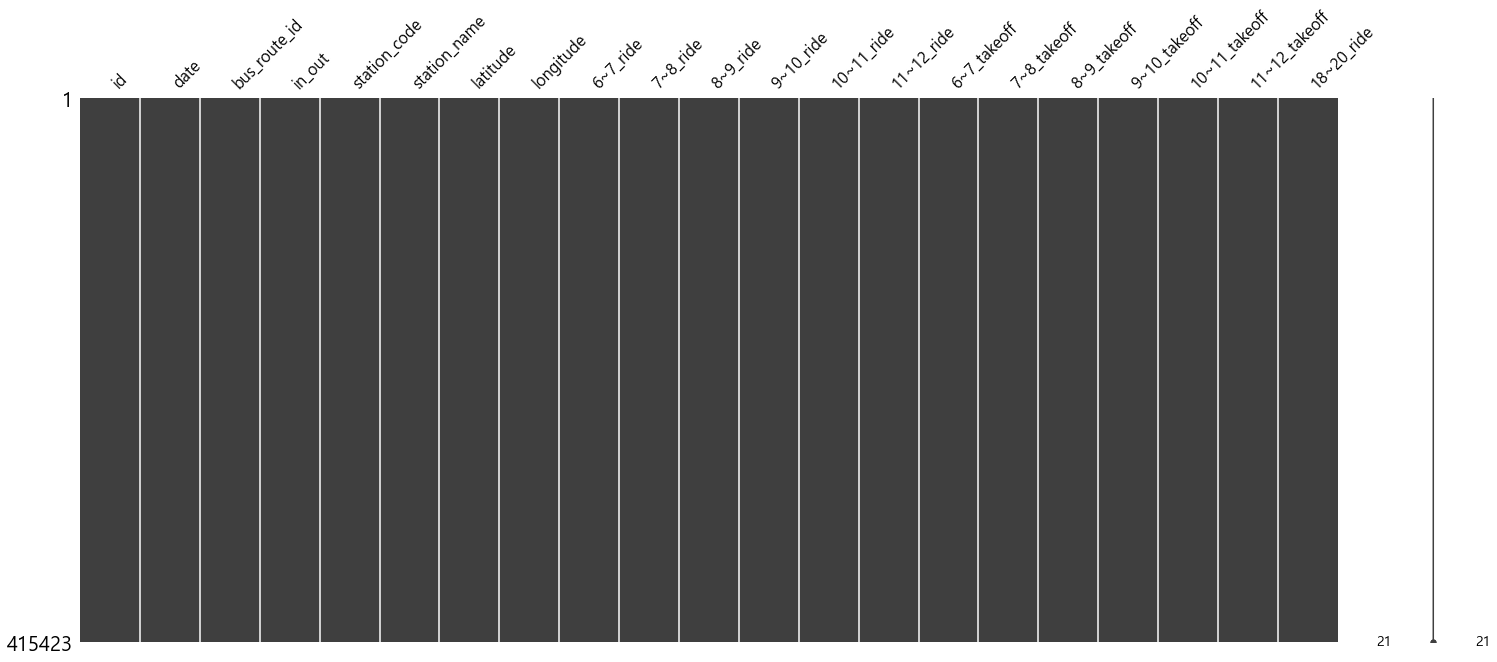

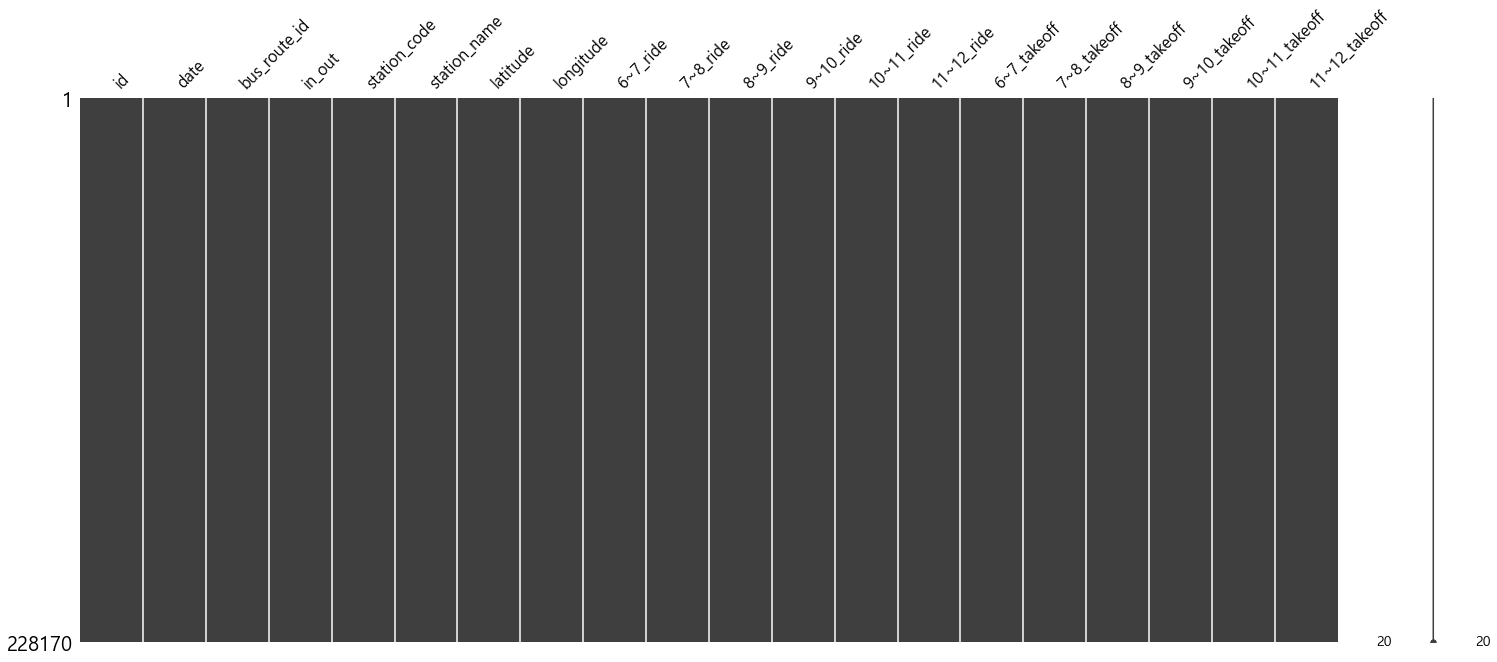

In [10]:
#train에 이상값 있나? #없음.
msno.matrix(train)
msno.matrix(test)

In [11]:
#한번 더 확인
print(train.isnull().sum())#train 결측값 개수 확인 
print("-----------------------------")
print(test.isnull().sum()) #train 결측값 개수 확인 

id               0
date             0
bus_route_id     0
in_out           0
station_code     0
station_name     0
latitude         0
longitude        0
6~7_ride         0
7~8_ride         0
8~9_ride         0
9~10_ride        0
10~11_ride       0
11~12_ride       0
6~7_takeoff      0
7~8_takeoff      0
8~9_takeoff      0
9~10_takeoff     0
10~11_takeoff    0
11~12_takeoff    0
18~20_ride       0
dtype: int64
-----------------------------
id               0
date             0
bus_route_id     0
in_out           0
station_code     0
station_name     0
latitude         0
longitude        0
6~7_ride         0
7~8_ride         0
8~9_ride         0
9~10_ride        0
10~11_ride       0
11~12_ride       0
6~7_takeoff      0
7~8_takeoff      0
8~9_takeoff      0
9~10_takeoff     0
10~11_takeoff    0
11~12_takeoff    0
dtype: int64


In [12]:
target_col = '18~20_ride'
train[target_col].value_counts().sort_index() #0의 분포가 압도적으로 많음.

0.0      296528
1.0       44268
2.0       23752
3.0       13560
4.0        8630
          ...  
240.0         1
241.0         1
245.0         1
265.0         1
272.0         1
Name: 18~20_ride, Length: 170, dtype: int64

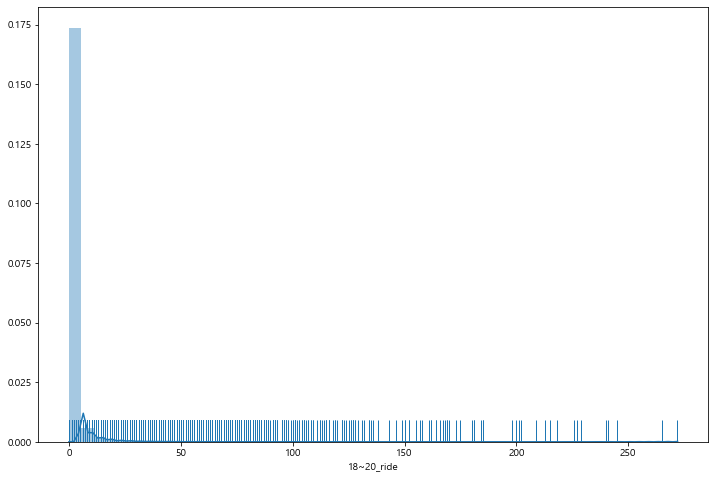

In [13]:
plt.figure(figsize=(12,8))
sns.distplot(train[target_col], rug=True) #0의 분포가 매우 높음.(시각화로 한번 더 확인.)

In [14]:
#하나의 station name에 다수의 station_code 발견.
multi_station = train.groupby('station_name')['station_code'].nunique().sort_values()
multi_station[multi_station >= 7]

station_name
금악리    7
신안동    8
Name: station_code, dtype: int64